In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('/content/loan_prediction.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [5]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural     

In [6]:
# Get a summary of the dataframe, including data types and non-null values
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [7]:
# Get descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


Descriptive Statistics for Numerical Features:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [8]:
# Check for missing values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


/tmp/ipython-input-3830643291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=df, palette='viridis')


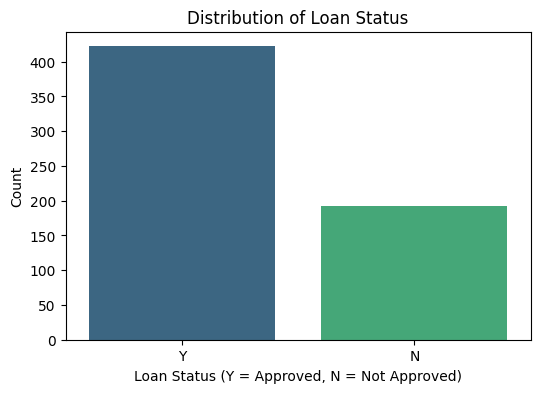

In [9]:
# Visualize the distribution of the target variable 'Loan_Status'
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (Y = Approved, N = Not Approved)')
plt.ylabel('Count')
plt.show()

2. Data Preprocessing and Feature Engineering

In [10]:
# Handle missing values
# Impute missing values for numerical features with the mean or mode
# 'LoanAmount' and 'Loan_Amount_Term' have missing values. We will use the median for 'LoanAmount'
# as it's less sensitive to outliers, and the mode for 'Loan_Amount_Term'.
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

/tmp/ipython-input-3013415295.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
/tmp/ipython-input-3013415295.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [11]:
# Impute missing values for categorical features with the mode
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[column].fillna(df[column].mode()[0], inplace=True)

/tmp/ipython-input-1376074803.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [12]:
# Verify that all missing values have been handled
print("\nMissing Values Count after Imputation:")
print(df.isnull().sum())


Missing Values Count after Imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [13]:
# --- Encoding Categorical Variables ---

# Convert the target variable 'Loan_Status' to numerical (Y=1, N=0)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0}).astype(int)

In [14]:
# Convert other categorical features into dummy variables using one-hot encoding
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [15]:
# Drop the 'Loan_ID' column as it's not useful for prediction
df.drop('Loan_ID', axis=1, inplace=True)

In [16]:
# Display the first few rows of the preprocessed data
print("\nFirst 5 rows of the preprocessed dataset:")
print(df.head())


First 5 rows of the preprocessed dataset:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0             1.0            1         True        False         False   
1             1.0            0         True         True          True   
2             1.0            1         True         True         False   
3             1.0            1         True         True         False   
4             1.0            1         True        False         False   

   Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0       

 3. Model Training and Evaluation

In [17]:
# --- Splitting the Data ---

# Define features (X) and target variable (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [18]:
# Split the data into a training set and a testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
print(f"\nShape of training data (X_train): {X_train.shape}")
print(f"Shape of testing data (X_test): {X_test.shape}")
print(f"Shape of training labels (y_train): {y_train.shape}")
print(f"Shape of testing labels (y_test): {y_test.shape}")


Shape of training data (X_train): (491, 14)
Shape of testing data (X_test): (123, 14)
Shape of training labels (y_train): (491,)
Shape of testing labels (y_test): (123,)


In [20]:
# --- Model Selection and Training ---

# Initialize a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)

In [21]:
# Train the model using the training data
model.fit(X_train, y_train)
print("\nLogistic Regression model trained successfully.")


Logistic Regression model trained successfully.


In [22]:
# --- Model Evaluation ---

# Make predictions on the test data
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model's performance
print("\nModel Evaluation:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")


Model Evaluation:
Accuracy Score: 0.8618


In [24]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123




Confusion Matrix:


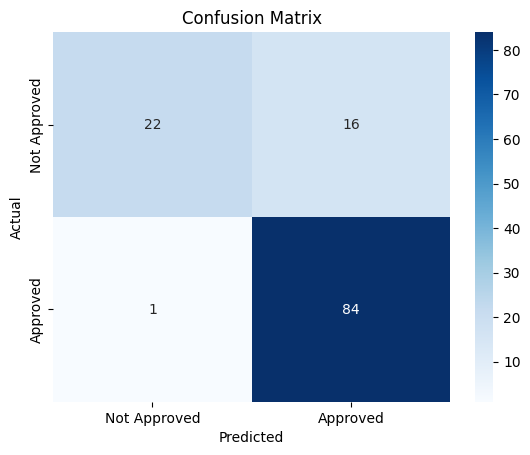

In [25]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# The confusion matrix will show:
# [TN, FP]
# [FN, TP]
# where:
# TN (True Negative): Correctly predicted as not approved
# FP (False Positive): Incorrectly predicted as approved
# FN (False Negative): Incorrectly predicted as not approved
# TP (True Positive): Correctly predicted as approved